In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,GridSearchCV,RepeatedKFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [192]:
data=pd.read_csv('/content/drive/MyDrive/let data confess/cancer_reg (1) (1).csv',encoding='ISO-8859-1')

In [134]:
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


### Checking is there null values in the data



In [135]:
data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

As we can see from above code output there are some null values in the data,here we are filling null values with mean of that particular columns


In [193]:
data.fillna(data['PctEmployed16_Over'].mean(),inplace=True)
data.fillna(data['PctPrivateCoverageAlone'].mean(),inplace=True)

In [194]:
data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

###Dropping columns with object data type


In [195]:
X=data.drop(labels=['Geography','binnedInc'], axis=1)

### Outlier Detection

In [196]:
data["TARGET_deathRate"].describe()

count    3047.000000
mean      178.664063
std        27.751511
min        59.700000
25%       161.200000
50%       178.100000
75%       195.200000
max       362.800000
Name: TARGET_deathRate, dtype: float64

In [197]:
Q1 = 161.200000
Q2 = 178.10
Q3 = 195.2
IQR = Q3 - Q1
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)

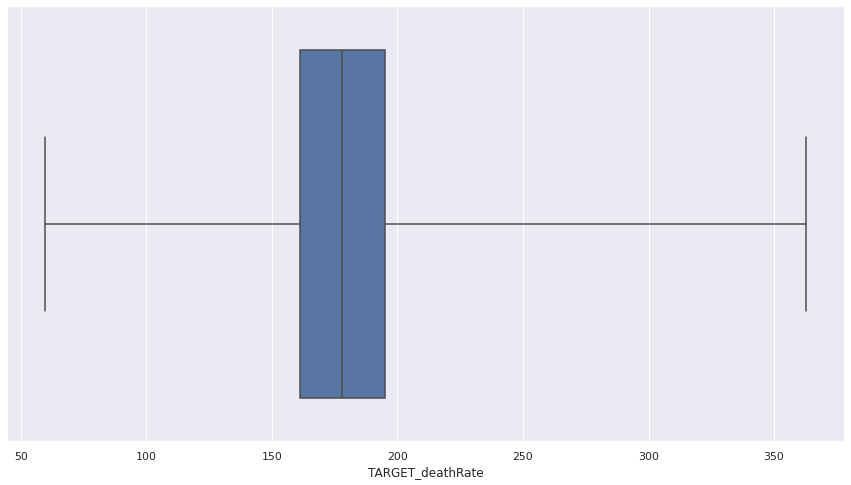

In [198]:
sns.boxplot(x = 'TARGET_deathRate' , data = data , whis = upper_limit - Q3)

In [199]:
sum(data["TARGET_deathRate"] > upper_limit)

43

In [200]:
X=X[X["TARGET_deathRate"] < upper_limit].iloc[:,:]

### Separating Features and target from our data


In [201]:
Y=X['TARGET_deathRate']
X=X.drop('TARGET_deathRate',axis=1)

In [145]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.35,random_state=45)

### function for model evaluation 


In [146]:
from sklearn import metrics

from sklearn.model_selection import cross_val_score



def cross_val(model):
  pred = cross_val_score(model, Features, Label, cv=10)

  return pred.mean()



def print_evaluate(true, predicted):

  mae = metrics.mean_absolute_error(true, predicted)

  mse = metrics.mean_squared_error(true, predicted)

  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))

  r2_square = metrics.r2_score(true, predicted)

  print('MAE:', mae)

  print('MSE:', mse)

  print('RMSE:', rmse)

  print('R2 Square', r2_square)

def evaluate(true, predicted):

  mae = metrics.mean_absolute_error(true, predicted)

  mse = metrics.mean_squared_error(true, predicted)

  rmse = np.sqrt(metrics.mean_squared_error(true, predicted))

  r2_square = metrics.r2_score(true, predicted)

  return mae, mse, rmse, r2_square

### Trying Different Machine Learning Model Without Scaling Datat

### Linear Regression


In [147]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred_lr=LR.predict(X_test)
test_pred = LR.predict(X_test)
train_pred = LR.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_lr)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 13.974009077403094
MSE: 349.3455032501519
RMSE: 18.690786587250734
R2 Square 0.5015861211869023
Train set evaluation:
_____________________________________
MAE: 13.691076092419848
MSE: 326.4815397948153
RMSE: 18.06880017585051
R2 Square 0.4983457515858378


### Random Forest Regressor

In [148]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
train_pred = RF.predict(X_train)
y_pred_lr=RF.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_lr)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 13.58100950570342
MSE: 327.0508182680608
RMSE: 18.084546393760082
R2 Square 0.5333941173267103
Train set evaluation:
_____________________________________
MAE: 4.961945696721308
MSE: 43.94309273155733
RMSE: 6.628958646088941
R2 Square 0.9324793702850782


### Hyperparameter Tunnning with Grid Search CV for Random Forest

In [149]:
 n_folds=5
 param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator=RF, param_grid=param_grid, n_jobs=-1, cv=n_folds)
grid.fit(X_train,y_train)

grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 30}

In [ ]:
grid_rf=RandomForestRegressor(bootstrap= True,
 max_features='auto',
 min_samples_split= 2,
 n_estimators= 30)
grid_rf.fit(X_train,y_train)
y_pred_grid_rf=grid_rf.predict(X_test)
train_pred = grid_rf.predict(X_train)


print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_grid_rf)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

### Support Vector Regressor 

In [151]:
linear=LinearSVR()
linear.fit(X_train,y_train)
y_pred_linear=linear.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_linear)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 58.83970028858965
MSE: 11796.791876135678
RMSE: 108.61303732119674
R2 Square -15.830572432831413
Train set evaluation:
_____________________________________
MAE: 6.334551961506968
MSE: 76.3407562744235
RMSE: 8.7373197420275
R2 Square 0.8826988357862957


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### Hyperparamter Tunning for SVR

In [152]:
K = 5              
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K)
svr.fit(X, Y)
svr.best_params_

Tuning hyper-parameters


{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [153]:
grid_svr=SVR(C=1,gamma=0.0001,kernel='rbf')
grid_svr.fit(X,Y)
grid_svr_pred=grid_svr.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, grid_svr_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 19.890668496577295
MSE: 660.2883831202839
RMSE: 25.69607719322706
R2 Square 0.057961556383461676
Train set evaluation:
_____________________________________
MAE: 6.334551961506968
MSE: 76.3407562744235
RMSE: 8.7373197420275
R2 Square 0.8826988357862957


### XGB Regressor

In [154]:
xgb=XGBRegressor(random_state=5)
xgb.fit(X_train,y_train)
final=xgb.predict(X_test)
train_pred = xgb.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, final)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

[04:48:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 12.594299632605491
MSE: 284.4116479795711
RMSE: 16.864508530626416
R2 Square 0.5942277449393167
Train set evaluation:
_____________________________________
MAE: 9.88351822133924
MSE: 162.52306616424457
RMSE: 12.748453481275467
R2 Square 0.7502756613503205


### Normalising Data
Data standardization helps improve the quality of your data by standardizing,so here standard scaler function noarmalising data into range of 0 to 1.



In [155]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_scale=sc.fit_transform(X)

X_scale=pd.DataFrame(X_scale,columns=X.columns)

X_train,X_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.35,random_state=45)

### Trying Different ML algorithms with Normalise Data

In [156]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred_lr1=LR.predict(X_test)
train_pred_lr = LR.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_lr1)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred_lr)

Test set evaluation:
_____________________________________
MAE: 13.9740090774031
MSE: 349.34550325015135
RMSE: 18.690786587250717
R2 Square 0.501586121186903
Train set evaluation:
_____________________________________
MAE: 13.691076092419841
MSE: 326.4815397948153
RMSE: 18.06880017585051
R2 Square 0.4983457515858378


In [157]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
train_pred_rf = RF.predict(X_train)
y_pred_RF=RF.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_RF)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred_rf)

Test set evaluation:
_____________________________________
MAE: 13.599485741444866
MSE: 333.6283201834601
RMSE: 18.265495344596054
R2 Square 0.5240099454623104
Train set evaluation:
_____________________________________
MAE: 4.929779713114746
MSE: 43.831365856557284
RMSE: 6.620526101191452
R2 Square 0.9326510438858001


### Hyperparameter Tunning

In [158]:
 n_folds=5
 param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator=RF, param_grid=param_grid, n_jobs=-1, cv=n_folds)
grid.fit(X_train,y_train)
grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 20}

In [ ]:
grid_rf=RandomForestRegressor(bootstrap= True,
 max_features='auto',
 min_samples_split= 2,
 n_estimators= 20)
grid_rf.fit(X_train,y_train)
y_pred_grid_rf=grid_rf.predict(X_test)
train_pred = grid_rf.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_grid_rf)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

In [160]:
xgb=XGBRegressor(random_state=5)
xgb.fit(X_train,y_train) 
final=xgb.predict(X_test)
train_pred = xgb.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, final)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

[04:49:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 12.597334446199945
MSE: 284.9413029048574
RMSE: 16.880204468692238
R2 Square 0.5934720822406749
Train set evaluation:
_____________________________________
MAE: 9.88351822133924
MSE: 162.52306616424457
RMSE: 12.748453481275467
R2 Square 0.7502756613503205


In [161]:
linear=LinearSVR()
linear.fit(X_train,y_train)
y_pred_linear=linear.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_linear)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 13.827745246037445
MSE: 349.04866727429055
RMSE: 18.68284419659626
R2 Square 0.5020096193247741
Train set evaluation:
_____________________________________
MAE: 9.88351822133924
MSE: 162.52306616424457
RMSE: 12.748453481275467
R2 Square 0.7502756613503205


In [162]:
K = 5              
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K)
svr.fit(X, Y)
svr.best_params_

Tuning hyper-parameters


{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [163]:
grid_svr=SVR(C=1,gamma=0.0001,kernel='rbf')
grid_svr.fit(X,Y)
grid_svr_pred=grid_svr.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, grid_svr_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 20.8738387430858
MSE: 701.0421275206675
RMSE: 26.477200145043046
R2 Square -0.0001821198161084947
Train set evaluation:
_____________________________________
MAE: 9.88351822133924
MSE: 162.52306616424457
RMSE: 12.748453481275467
R2 Square 0.7502756613503205


### Optimisation SGD Regressor

In [164]:
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)
pred=reg.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 14.10356780897792
MSE: 352.6151816836099
RMSE: 18.778050529370983
R2 Square 0.4969212461696778
Train set evaluation:
_____________________________________
MAE: 9.88351822133924
MSE: 162.52306616424457
RMSE: 12.748453481275467
R2 Square 0.7502756613503205


### RFE
RFE-Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop


In [165]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.35,random_state=45)
from sklearn.feature_selection import RFE

rfe=RFE(xgb)

rfe=rfe.fit(X_train,y_train)

imp_features = pd.DataFrame(list(zip(X.columns, rfe.support_, rfe.ranking_)), columns=['Feature','Support','Ranking'])

[04:52:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [166]:
rfe_cols = X.columns[rfe.support_]
rfe_cols

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'AvgHouseholdSize', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPublicCoverageAlone', 'PctBlack', 'PctOtherRace',
       'PctMarriedHouseholds'],
      dtype='object')

In [167]:
x_new_df=X[rfe_cols]

In [168]:
X_train,X_test,y_train,y_test=train_test_split(x_new_df,Y,test_size=0.35,random_state=45)

### Tring Different algorithms with RFE

In [169]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred_lr=LR.predict(X_test)
test_pred = LR.predict(X_test)
train_pred = LR.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 14.321778392625749
MSE: 355.8634736510954
RMSE: 18.8643439761656
R2 Square 0.49228688338564464
Train set evaluation:
_____________________________________
MAE: 14.118330928673869
MSE: 343.3974853977707
RMSE: 18.530987167384545
R2 Square 0.4723536051906737


In [170]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
train_pred= RF.predict(X_train)
y_pred_lr=RF.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_lr)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 13.451495247148287
MSE: 321.6044752576045
RMSE: 17.933334192436288
R2 Square 0.5411644562030758
Train set evaluation:
_____________________________________
MAE: 4.870814036885241
MSE: 42.30282706711056
RMSE: 6.504062351108772
R2 Square 0.9349997156608527


### Hyperparamter Tunning

In [171]:
 n_folds=5
 param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator=RF, param_grid=param_grid, n_jobs=-1, cv=n_folds)
grid.fit(X_train,y_train)
grid.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 30}

In [207]:
grid_rf=RandomForestRegressor(bootstrap= False,
 max_features='log2',
 min_samples_split= 8,
 n_estimators= 30)
grid_rf.fit(X_train,y_train)
y_pred_grid_rf=grid_rf.predict(X_test)
train_pred = grid_rf.predict(X_train)


print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_grid_rf)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Test set evaluation:
_____________________________________
MAE: 0.5248630630606732
MSE: 0.4758676563318501
RMSE: 0.6898316144769316
R2 Square 0.5180183191872768
Train set evaluation:
_____________________________________
MAE: 0.11426227080953837
MSE: 0.025226939267403187
RMSE: 0.15882990671596828
R2 Square 0.9749041185854889


In [173]:
xgb=XGBRegressor(random_state=5)
xgb.fit(X_train,y_train) 
final=xgb.predict(X_test)
train_pred = xgb.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, final)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

[04:53:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 12.669216905891215
MSE: 283.33850414288264
RMSE: 16.832661825833807
R2 Square 0.5957588073895046
Train set evaluation:
_____________________________________
MAE: 9.990936441108829
MSE: 168.5648110104904
RMSE: 12.983251172587334
R2 Square 0.7409922361010449


In [174]:
linear=LinearSVR()
linear.fit(X_train,y_train)
y_pred_linear=linear.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_linear)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 41.688038415808485
MSE: 9028.414195256064
RMSE: 95.01796774955811
R2 Square -11.880907001017338
Train set evaluation:
_____________________________________
MAE: 9.990936441108829
MSE: 168.5648110104904
RMSE: 12.983251172587334
R2 Square 0.7409922361010449


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### Optimisation with RFE Data

In [175]:
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)
pred=reg.predict(X_test)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 14.29708176699189
MSE: 355.16787356348993
RMSE: 18.845898056698967
R2 Square 0.49327930130584297
Train set evaluation:
_____________________________________
MAE: 9.990936441108829
MSE: 168.5648110104904
RMSE: 12.983251172587334
R2 Square 0.7409922361010449


### Checking for Multicolinearity

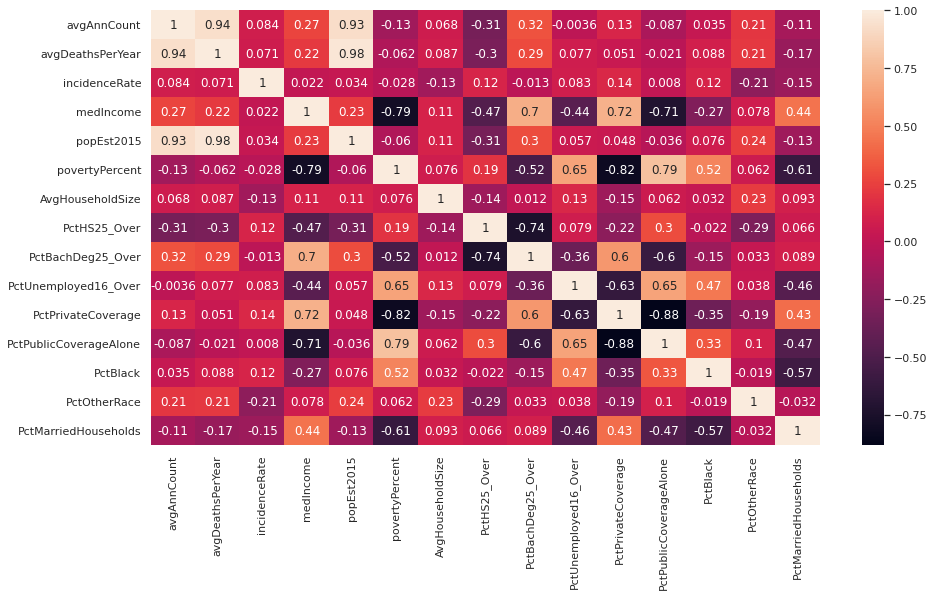

In [176]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(x_new_df.corr(),annot=True)

### VIF-Variation Inflation Factor
as ypu can see from above heatmap there is multicolinearity in the data,to remove multicollinearity we are going to use VIF.

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature name']=X_scale.columns
vif['VIF']=[variance_inflation_factor(X_scale.values, i) for i in range(X_scale.shape[1])]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [178]:
vif

,Feature name,VIF
0,avgAnnCount,9.957731
1,avgDeathsPerYear,31.740232
2,incidenceRate,1.287817
3,medIncome,7.699701
4,popEst2015,26.481211
5,povertyPercent,8.739489
6,studyPerCap,1.052110
7,MedianAge,1.025349
8,MedianAgeMale,9.899136
9,MedianAgeFemale,10.887188


In [179]:
remove=[]
for i in range(len(vif)):
  if vif['VIF'][i]>10:
    remove.append(vif['Feature name'][i])

In [180]:
X=X.drop(remove, axis=1)

In [181]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.35,random_state=45)

LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred_lr=LR.predict(X_test)
test_pred = LR.predict(X_test)
train_pred = LR.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 14.164444541627212
MSE: 352.9150549391502
RMSE: 18.786033507346627
R2 Square 0.49649341472185426
Train set evaluation:
_____________________________________
MAE: 14.102661534819642
MSE: 343.77562551855175
RMSE: 18.54118727370369
R2 Square 0.4717725751017907


In [182]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
train_pred = RF.predict(X_train)
y_pred_lr=RF.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_lr)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 13.8817252851711
MSE: 345.94851907129265
RMSE: 18.599691370323665
R2 Square 0.5064326242765373
Train set evaluation:
_____________________________________
MAE: 5.140065061475404
MSE: 47.31491049026631
RMSE: 6.878583465384883
R2 Square 0.9272984136386543


### Hyperparameter with VIF

In [183]:
 n_folds=5
 param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator=RF, param_grid=param_grid, n_jobs=-1, cv=n_folds)
grid.fit(X_train,y_train)
grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 30}

In [208]:
grid_rf=RandomForestRegressor(bootstrap= False,max_features='sqrt',min_samples_split= 4,n_estimators= 30)
grid_rf.fit(X_train,y_train)
y_pred_grid_rf=grid_rf.predict(X_test)
train_pred = grid_rf.predict(X_train)


print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_grid_rf)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Test set evaluation:
_____________________________________
MAE: 0.519080040215109
MSE: 0.47315733835420004
RMSE: 0.6878643313577177
R2 Square 0.5207634597679044
Train set evaluation:
_____________________________________
MAE: 0.034334678909172384
MSE: 0.0026929063786751365
RMSE: 0.05189322093178585
R2 Square 0.9973210836866391


In [185]:
linear=LinearSVR()
linear.fit(X_train,y_train)
y_pred_linear=linear.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, y_pred_linear)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 18.329120400509126
MSE: 544.1716949712306
RMSE: 23.327487969587096
R2 Square 0.22362611595805337
Train set evaluation:
_____________________________________
MAE: 3.169715822599531
MSE: 19.231818282953725
RMSE: 4.3854097052560235
R2 Square 0.970449406259122


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


###  SVR model Tunning with VIF data

In [186]:
K = 5              
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K)
svr.fit(X, Y)
svr.best_params_

Tuning hyper-parameters


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [187]:
grid_svr=SVR(C=1,gamma=0.0001,kernel='rbf')
grid_svr.fit(X,Y)
grid_svr_pred=grid_svr.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, grid_svr_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 19.566881071153738
MSE: 640.7166009911642
RMSE: 25.312380389666323
R2 Square 0.085884766373299
Train set evaluation:
_____________________________________
MAE: 3.169715822599531
MSE: 19.231818282953725
RMSE: 4.3854097052560235
R2 Square 0.970449406259122


In [188]:
xgb=XGBRegressor(random_state=5)
xgb.fit(X_train,y_train)
final=xgb.predict(X_test)
train_pred = xgb.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, final)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

[04:56:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 13.54735890812747
MSE: 331.52777917505944
RMSE: 18.2079043048633
R2 Square 0.527006803248836
Train set evaluation:
_____________________________________
MAE: 10.79727138613091
MSE: 199.7235001583906
RMSE: 14.132356497003272
R2 Square 0.6931154440598043


### Optimisation with VIF data.

In [189]:
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)
pred=reg.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 14.104733017535942
MSE: 352.401629853798
RMSE: 18.77236345945278
R2 Square 0.4972259221847801
Train set evaluation:
_____________________________________
MAE: 10.79727138613091
MSE: 199.7235001583906
RMSE: 14.132356497003272
R2 Square 0.6931154440598043


### Neural Network Regressor

In [203]:
Y=np.array(Y).reshape(-1,1)

TargetVariable=Y
Predictors=X

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(Y)
 
# Generating the standardized values of X and y
xx=PredictorScalerFit.transform(X)
yy=TargetVarScalerFit.transform(Y)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.3, random_state=42)

In [204]:
 # create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=31, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train , epochs =20 , verbose=1)

Epoch 1/20
66/66 [==============================] - 0s 2ms/step - loss: 0.9800
Epoch 2/20
66/66 [==============================] - 0s 1ms/step - loss: 0.8057
Epoch 3/20
66/66 [==============================] - 0s 2ms/step - loss: 0.6675
Epoch 4/20
66/66 [==============================] - 0s 2ms/step - loss: 0.5891
Epoch 5/20
66/66 [==============================] - 0s 1ms/step - loss: 0.5448
Epoch 6/20
66/66 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 7/20
66/66 [==============================] - 0s 1ms/step - loss: 0.5204
Epoch 8/20
66/66 [==============================] - 0s 1ms/step - loss: 0.5138
Epoch 9/20
66/66 [==============================] - 0s 2ms/step - loss: 0.5076
Epoch 10/20
66/66 [==============================] - 0s 2ms/step - loss: 0.5053
Epoch 11/20
66/66 [==============================] - 0s 2ms/step - loss: 0.5007
Epoch 12/20
66/66 [==============================] - 0s 1ms/step - loss: 0.4962
Epoch 13/20
66/66 [==============================

In [205]:
pred=model.predict(X_test)

In [206]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, pred)
print('====================================')


Test set evaluation:
_____________________________________
MAE: 0.5353955249718063
MSE: 0.49910859704303956
RMSE: 0.7064761829269545
R2 Square 0.4944787751174097


# Conclusion: Highest Accuracy I got is 59.57% with XGBoost Regressor with RFE.

